## 1 Eksik değerlerin ele alınması

In [1]:
# İlgili kütüphaneler import edilir

import pandas as pd
import numpy as np
import seaborn as sns
import missingno
from collections import Counter

In [2]:
# Veri seti okunur

df = pd.read_csv("Car_sales.csv",delimiter=",")
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
#Toplam satır ve sütun sayısına bakılır

df.shape

(157, 16)

In [4]:
# eksik değerleri ve eksik değer yüzdelerini görelim 

def eksik_data(df,n):
    eksik_değerler = df.isnull().sum().sort_values(ascending=False)

    eksik_değer_yüzdesi = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False) * 100

    eksik_data = pd.concat([eksik_değerler,eksik_değer_yüzdesi],axis=1,keys = ["Eksik Değerler","Eksik Değerler Yüzdesi"],sort=False)
    print(eksik_data.head(n))

eksik_data(df,15)

                     Eksik Değerler  Eksik Değerler Yüzdesi
__year_resale_value              36               22.929936
Fuel_efficiency                   3                1.910828
Price_in_thousands                2                1.273885
Curb_weight                       2                1.273885
Power_perf_factor                 2                1.273885
Engine_size                       1                0.636943
Horsepower                        1                0.636943
Wheelbase                         1                0.636943
Width                             1                0.636943
Length                            1                0.636943
Fuel_capacity                     1                0.636943
Manufacturer                      0                0.000000
Model                             0                0.000000
Sales_in_thousands                0                0.000000
Vehicle_type                      0                0.000000


<Axes: >

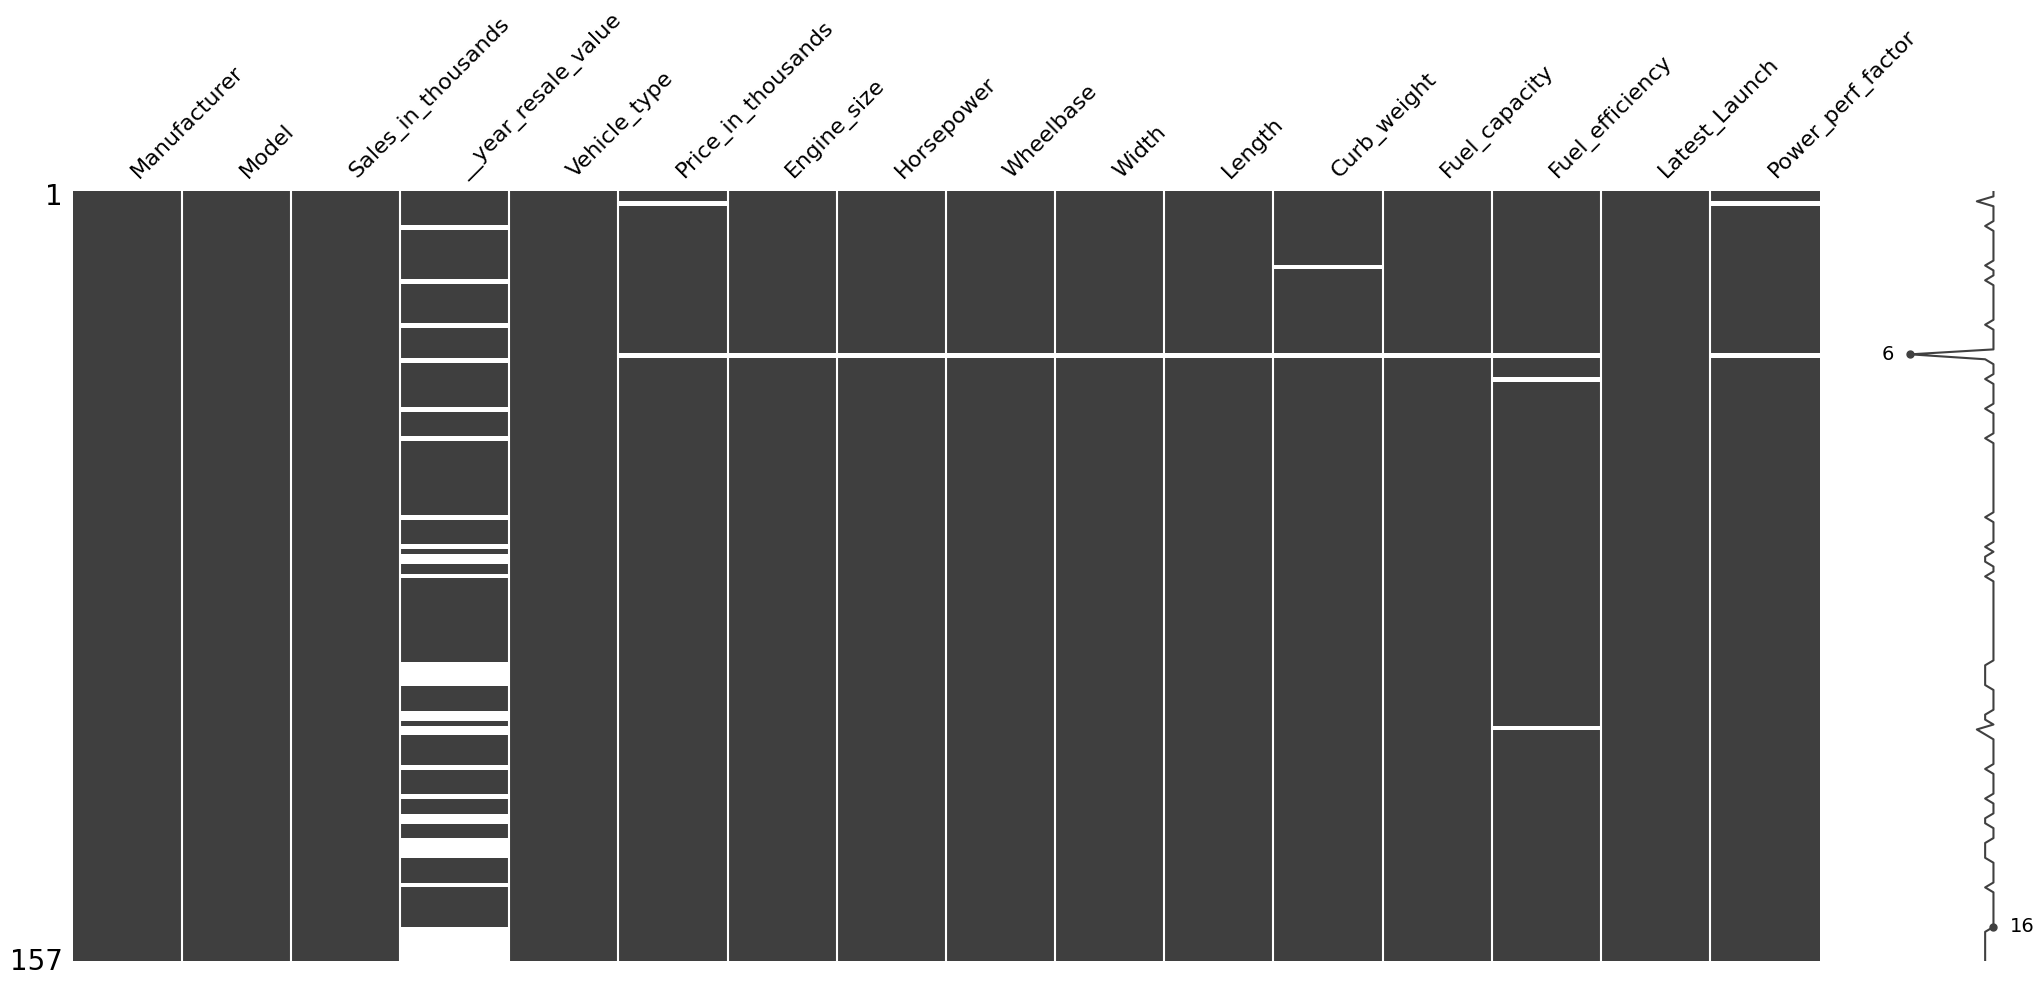

In [5]:
# Veri kümesindeki eksik verilerin görsel temsili
missingno.matrix(df)

In [6]:
# Toplam kaç tane eksik değerimiz var

df.isnull().sum().sum()

51

In [7]:
# year_resale_value : yıl satış değeri
# Horsepower : Beygir gücü
# Engine_size : Motor boyutu
# Price_in_thousands : aracın fiyatı
# Wheelbase : Dingil açıklığı
# Width : genişlik
# Length : uzunluk
# Fuel_capacity :yakıt deposu hacmi
# Power_perf_factor: arac performansı
# Curb_weight :arac ağırlığı
# Fuel_efficiency :Yakıt verimliliği

In [7]:
#Price_in_thousands bu sutundaki nan değer 9 sutunda da nan değere etki ediyor. o yüzden bu sutunda ki nan olmayan değerleri filtreleyerek df elde ettim.

df = df[df['Price_in_thousands'].notna()]
eksik_data(df,15)

                     Eksik Değerler  Eksik Değerler Yüzdesi
__year_resale_value              36               23.225806
Fuel_efficiency                   2                1.290323
Curb_weight                       1                0.645161
Manufacturer                      0                0.000000
Model                             0                0.000000
Sales_in_thousands                0                0.000000
Vehicle_type                      0                0.000000
Price_in_thousands                0                0.000000
Engine_size                       0                0.000000
Horsepower                        0                0.000000
Wheelbase                         0                0.000000
Width                             0                0.000000
Length                            0                0.000000
Fuel_capacity                     0                0.000000
Latest_Launch                     0                0.000000


In [8]:
def eksik_verileri_doldur(df):
    # year_resale_value : herhangi bir markaya ait aracın o yıl içerisinde hiç satılmadığını düşünerek nan değerleri 0 ile dolduruyorum
    df.loc[:, '__year_resale_value'] = df['__year_resale_value'].fillna(0)

    # bu iki değeri de mean ile doldurdum.
    for col in ["Fuel_efficiency", "Curb_weight"]:
        df.loc[:, col] = df[col].fillna(df[col].mean())
    
    return df

df = eksik_verileri_doldur(df)

In [9]:
eksik_verilerin_toplamı = df.isnull().sum().sum()
print("Eksik verilerin toplamı:",eksik_verilerin_toplamı)

Eksik verilerin toplamı: 0


## 2 Aykırı değerlerin tespiti 

In [ ]:
# Bu kod ile aykırı değerleri mean veya medyan ile doldurabilir veya silebilirsiniz
#Z skoru (z-score), bir veri noktasının ortalama değerden ne kadar uzak olduğunu standart sapma birimiyle ifade eden bir ölçümdür. Z skoru 3'ten büyük olan değerler genellikle istatistiksel anlamda önemli bir sapma gösterir ve bu değerler "aykırı" olarak kabul edilebilir.

"""
from scipy import stats

def aykiri_degerleri_sil_doldur(df, column_name):
    z = np.abs(stats.zscore(df[column_name]))
    aykiri_degerler = np.where(z > 3)[0]
    
    # Aykırı değerleri ortalama ile doldur
    df[column_name].iloc[aykiri_degerler] = df[column_name].mean()
    
    # Aykırı değerleri medyan  ile doldur
    #df[column_name].iloc[aykiri_degerler] = df[column_name].median()

    # Aykırı değerleri sil
    #df = df[~(z > 3)].reset_index(drop=True)
    
    return aykiri_degerler, df

column_name = "Sales_in_thousands"
aykiri_degerler, df = aykiri_degerleri_sil_doldur(df, column_name)

print("z>3 olan aykırı Değerlerin İndeksleri:", aykiri_degerler)
print("Aykırı Değerlerden Arındırılmış DataFrame:")
df.head(3)

"""


In [10]:
# Aykırı değerleri min-max ile doldurcağım.

def aykiri_degerleri_min_max_sinirlar_ile_doldur(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR

    # Aykırı değerleri alt sınır ve üst sınır içine koy
    df.loc[df[column_name] < alt_sinir, column_name] = alt_sinir
    df.loc[df[column_name] > ust_sinir, column_name] = ust_sinir

    return alt_sinir, ust_sinir, df

In [11]:
df.head(3)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.0,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779


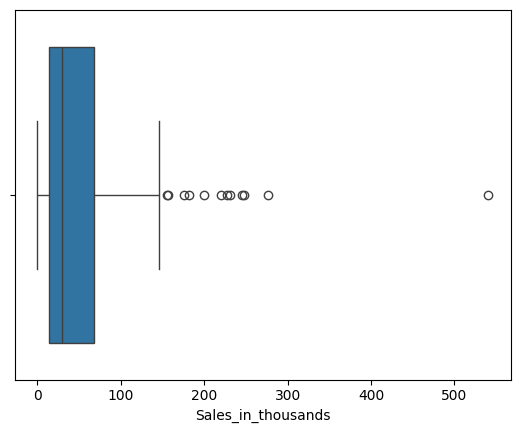

In [12]:
import seaborn as sns
sns.boxplot(x = df.Sales_in_thousands);

In [15]:
column_name = "Sales_in_thousands"
alt_sinir, ust_sinir, df = aykiri_degerleri_min_max_sinirlar_ile_doldur(df, column_name)

print("Alt Sınır:", alt_sinir)
print("Üst Sınır:", ust_sinir)
print("Aykırı Değerlerden Doldurulmuş DataFrame:")
df.head(3)

Alt Sınır: -67.08900000000001
Üst Sınır: 149.34700000000004
Aykırı Değerlerden Doldurulmuş DataFrame:


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.0,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779


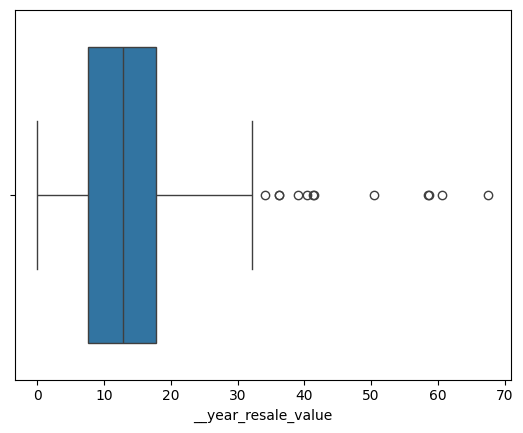

In [13]:
sns.boxplot(x=df.__year_resale_value);

In [14]:
column_name = "__year_resale_value"
alt_sinir, ust_sinir, df = aykiri_degerleri_min_max_sinirlar_ile_doldur(df, column_name)

print("Alt Sınır:", alt_sinir)
print("Üst Sınır:", ust_sinir)
print("Aykırı Değerlerden Doldurulmuş DataFrame:")
df.head(3)

Alt Sınır: -7.742499999999994
Üst Sınır: 33.13749999999999
Aykırı Değerlerden Doldurulmuş DataFrame:


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.0,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779


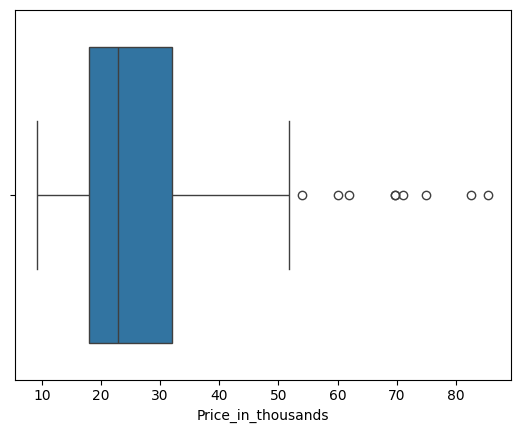

In [15]:
sns.boxplot(x=df.Price_in_thousands);

In [16]:
column_name = "Price_in_thousands"
alt_sinir, ust_sinir, df = aykiri_degerleri_min_max_sinirlar_ile_doldur(df, column_name)

print("Alt Sınır:", alt_sinir)
print("Üst Sınır:", ust_sinir)
print("Aykırı Değerlerden Doldurulmuş DataFrame:")
df.head(3)


Alt Sınır: -2.8775000000000013
Üst Sınır: 52.8425
Aykırı Değerlerden Doldurulmuş DataFrame:


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.0,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779


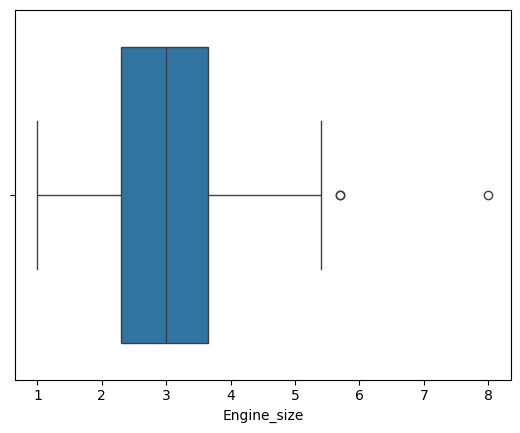

In [17]:
sns.boxplot(x=df.Engine_size);

In [18]:
column_name = "Engine_size"
alt_sinir, ust_sinir, df = aykiri_degerleri_min_max_sinirlar_ile_doldur(df, column_name)

print("Alt Sınır:", alt_sinir)
print("Üst Sınır:", ust_sinir)
print("Aykırı Değerlerden Doldurulmuş DataFrame:")
df.head(3)


Alt Sınır: 0.27499999999999947
Üst Sınır: 5.675000000000001
Aykırı Değerlerden Doldurulmuş DataFrame:


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.0,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779


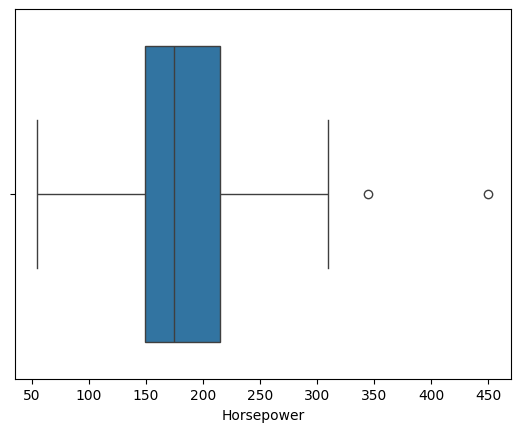

In [19]:
sns.boxplot(x=df.Horsepower);

In [20]:
column_name = "Horsepower"
alt_sinir, ust_sinir, df = aykiri_degerleri_min_max_sinirlar_ile_doldur(df, column_name)

print("Alt Sınır:", alt_sinir)
print("Üst Sınır:", ust_sinir)
print("Aykırı Değerlerden Doldurulmuş DataFrame:")
df.head(3)

Alt Sınır: 50.0
Üst Sınır: 314.0
Aykırı Değerlerden Doldurulmuş DataFrame:


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.0,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779


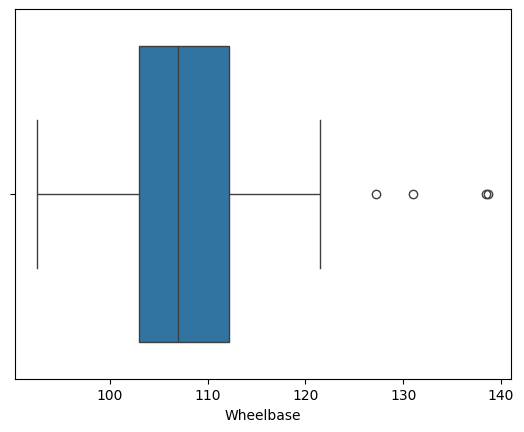

In [21]:
sns.boxplot(x=df.Wheelbase);

In [22]:
column_name = "Wheelbase"
alt_sinir, ust_sinir, df = aykiri_degerleri_min_max_sinirlar_ile_doldur(df, column_name)

print("Alt Sınır:", alt_sinir)
print("Üst Sınır:", ust_sinir)
print("Aykırı Değerlerden Doldurulmuş DataFrame:")
df.head(3)

Alt Sınır: 89.19999999999999
Üst Sınır: 126.0
Aykırı Değerlerden Doldurulmuş DataFrame:


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.0,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779


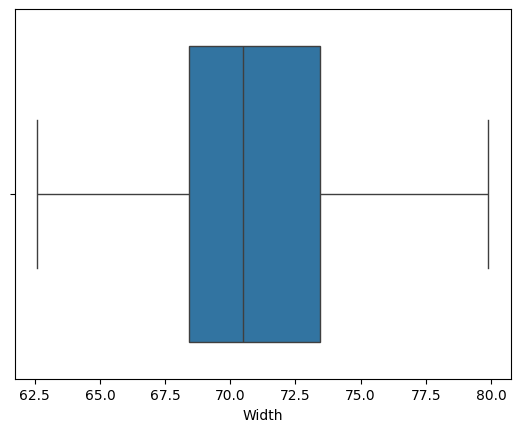

In [23]:
sns.boxplot(x=df.Width);
# aykırı değer yok

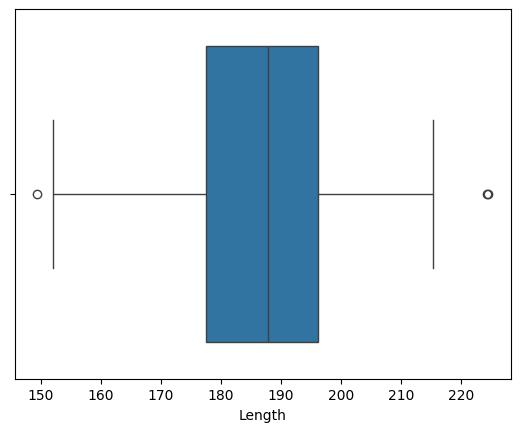

In [25]:
sns.boxplot(x=df.Length);

In [26]:
column_name = "Length"
alt_sinir, ust_sinir, df = aykiri_degerleri_min_max_sinirlar_ile_doldur(df, column_name)

print("Alt Sınır:", alt_sinir)
print("Üst Sınır:", ust_sinir)
print("Aykırı Değerlerden Doldurulmuş DataFrame:")
df.head(3)

Alt Sınır: 149.65000000000006
Üst Sınır: 224.04999999999993
Aykırı Değerlerden Doldurulmuş DataFrame:


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.0,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779


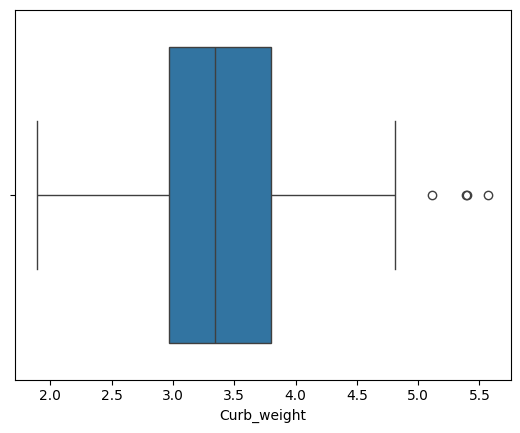

In [27]:
sns.boxplot(x=df.Curb_weight);

In [28]:
column_name = "Curb_weight"
alt_sinir, ust_sinir, df = aykiri_degerleri_min_max_sinirlar_ile_doldur(df, column_name)

print("Alt Sınır:", alt_sinir)
print("Üst Sınır:", ust_sinir)
print("Aykırı Değerlerden Doldurulmuş DataFrame:")
df.head(3)

Alt Sınır: 1.72825
Üst Sınır: 5.04225
Aykırı Değerlerden Doldurulmuş DataFrame:


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.0,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779


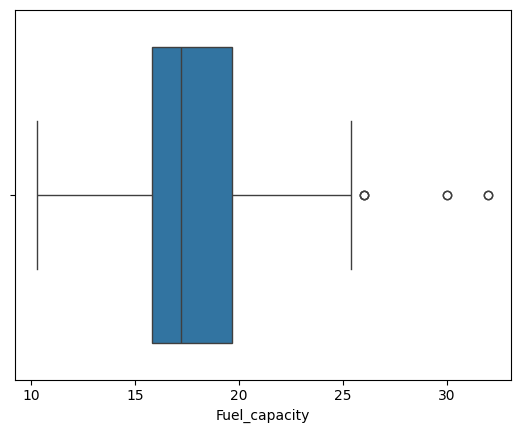

In [29]:
sns.boxplot(x=df.Fuel_capacity);

In [30]:
column_name = "Fuel_capacity"
alt_sinir, ust_sinir, df = aykiri_degerleri_min_max_sinirlar_ile_doldur(df, column_name)

print("Alt Sınır:", alt_sinir)
print("Üst Sınır:", ust_sinir)
print("Aykırı Değerlerden Doldurulmuş DataFrame:")
df.head(3)

Alt Sınır: 10.025000000000004
Üst Sınır: 25.424999999999997
Aykırı Değerlerden Doldurulmuş DataFrame:


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.0,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779


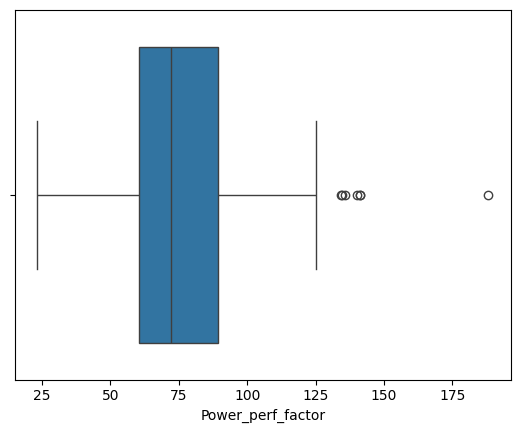

In [31]:
sns.boxplot(x=df.Power_perf_factor);

In [32]:
column_name = "Power_perf_factor"
alt_sinir, ust_sinir, df = aykiri_degerleri_min_max_sinirlar_ile_doldur(df, column_name)

print("Alt Sınır:", alt_sinir)
print("Üst Sınır:", ust_sinir)
print("Aykırı Değerlerden Doldurulmuş DataFrame:")
df.head(3)

Alt Sınır: 16.896950657499993
Üst Sınır: 132.92563363750003
Aykırı Değerlerden Doldurulmuş DataFrame:


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.0,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779


In [33]:
df.shape

(155, 16)

In [34]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105


## 3 Kategorik verilerin dönüşümü

In [35]:
def sütunlari_veri_türune_gore_grupla(df):
    result_dict = {}

    for col, dtype in df.dtypes.items():
        dtype_str = str(dtype)
        
        if dtype_str not in result_dict:
            result_dict[dtype_str] = []
        
        result_dict[dtype_str].append(col)

    for dtype, columns in result_dict.items():
        print(f"\n{dtype} Veri Türü Sütunları:")
        print(', '.join(columns))
        print('=' * 50)


sütunlari_veri_türune_gore_grupla(df)


object Veri Türü Sütunları:
Manufacturer, Model, Vehicle_type, Latest_Launch

float64 Veri Türü Sütunları:
Sales_in_thousands, __year_resale_value, Price_in_thousands, Engine_size, Horsepower, Wheelbase, Width, Length, Curb_weight, Fuel_capacity, Fuel_efficiency, Power_perf_factor


In [36]:
#object Veri Türünde olan  Latest_Launch sutununu kullanarak yeni bir age sutunu oluşturdum

df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'])
df['Age'] = 2022 - df['Latest_Launch'].dt.year
df = df.drop(columns=['Latest_Launch'])
df['Age'] = df['Age'].astype(int)  
df.head()



,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,10
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,11
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,11
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,11
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,11


In [37]:
sütunlari_veri_türune_gore_grupla(df)


object Veri Türü Sütunları:
Manufacturer, Model, Vehicle_type

float64 Veri Türü Sütunları:
Sales_in_thousands, __year_resale_value, Price_in_thousands, Engine_size, Horsepower, Wheelbase, Width, Length, Curb_weight, Fuel_capacity, Fuel_efficiency, Power_perf_factor

int32 Veri Türü Sütunları:
Age


In [38]:
# araç markalarının ortalama fiyatlarını buldum bu fiyatlara göre yeni sutun oluşturacağım.
ortalama_satış = df[['Manufacturer', 'Price_in_thousands']].groupby('Manufacturer', as_index=False, observed=False).mean()
ortalama_satış.head()

,Manufacturer,Price_in_thousands
0,Acura,30.633333
1,Audi,36.927500
2,BMW,33.096667
3,Buick,26.781250
4,Cadillac,40.254000


In [39]:
# Manufacturer sutunu kategorik veri tipine sahip o yüzden bu sutuna işlem yapacağım. eğer bir Üreticinin ortalama fiyatı 30'un altındaysa sınıf 1'e, değilse sınıf 2'ye ait olacak.
class_1 = []
class_2 = []

for index in range(len(ortalama_satış)):
    if ortalama_satış.iloc[index, 1] <= 30:
        class_1.append(ortalama_satış.iloc[index, 0])
    else:
        class_2.append(ortalama_satış.iloc[index, 0])
        
print('ortalama 30 un altında: ', class_1)
print('ortalama 30 un üstünde: ', class_2)

ortalama 30 un altında:  ['Buick', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jeep', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen']
ortalama 30 un üstünde:  ['Acura', 'Audi', 'BMW', 'Cadillac', 'Jaguar', 'Lexus', 'Lincoln', 'Mercedes-B', 'Porsche', 'Volvo']


In [40]:
# burada Manufacturer sutununu 1 ve 2 değerleri ile güncelledim

yeni_Manufacturer = []

for i in df["Manufacturer"]:
    if i in class_1:
        yeni_Manufacturer.append(1)
    else:
        yeni_Manufacturer.append(2)
        
df.loc[:,'Manufacturer'] = yeni_Manufacturer

In [41]:
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,2,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,10
1,2,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,11
3,2,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,11
4,2,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,11
5,2,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,11


In [42]:
# düzenlemiş olduğum Manufacturer sutununa göre model sutununu grupluyorum.

df['Model'] = df.groupby('Manufacturer')['Model'].transform(lambda x: x.iloc[0])

df.head(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,2,Integra,16.919,16.3600,Passenger,21.5000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,10
1,2,Integra,39.384,19.8750,Passenger,28.4000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,11
3,2,Integra,8.588,29.7250,Passenger,42.0000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,11
4,2,Integra,20.397,22.2550,Passenger,23.9900,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,11
5,2,Integra,18.780,23.5550,Passenger,33.9500,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,11
6,2,Integra,1.380,33.1375,Passenger,52.8425,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,132.925634,10
7,2,Integra,19.747,0.0000,Passenger,26.9900,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,71.191207,11
8,2,Integra,9.231,28.6750,Passenger,33.4000,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,81.877069,10
9,2,Integra,17.527,33.1375,Passenger,38.9000,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,83.998724,11
10,1,Century,91.561,12.4750,Passenger,21.9750,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,71.181451,11


In [43]:
df["Model"].unique()

array(['Integra', 'Century'], dtype=object)

In [44]:
# oluşturduğum Manufacturer sutunu kategorik olduğu için encod uyguladım
try:
    df = pd.get_dummies(df, columns=['Manufacturer'], prefix='Manufacturer',dtype=int)
    df.drop('Manufacturer', axis=1, inplace=True)                               
    print(df.head())
except:
    print("bu kod çalıştı...")

bu kod çalıştı...


In [45]:
df.head()

,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Manufacturer_1,Manufacturer_2
0,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,10,0,1
1,Integra,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,11,0,1
3,Integra,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,11,0,1
4,Integra,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,11,0,1
5,Integra,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,11,0,1


In [46]:
# Manufacturer_1 ve Manufacturer_2 adında iki kolon oluştu bir tanesini siliyorum
df.drop(columns=['Manufacturer_2'], inplace=True)
df.head()

,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Manufacturer_1
0,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,10,0
1,Integra,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,11,0
3,Integra,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,11,0
4,Integra,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,11,0
5,Integra,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,11,0


In [47]:
# oluşturduğum model sutunu kategorik olduğu için encod uyguladım
try:
    df = pd.get_dummies(df, columns=['Model'], prefix='Model',dtype=int)
    df.drop('Model', axis=1, inplace=True)                               
    print(df.head())
except:
    print("bu kod çalıştı...")

bu kod çalıştı...


In [48]:
df.head()

,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Manufacturer_1,Model_Century,Model_Integra
0,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,10,0,0,1
1,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,11,0,0,1
3,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,11,0,0,1
4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,11,0,0,1
5,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,11,0,0,1


In [49]:
# Model_Century ve Model_Integra adında iki kolon oluştu bir tanesini siliyorum
df.drop(columns=['Model_Century'], inplace=True)
df.head()

,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Manufacturer_1,Model_Integra
0,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,10,0,1
1,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,11,0,1
3,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,11,0,1
4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,11,0,1
5,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,11,0,1


In [50]:
sütunlari_veri_türune_gore_grupla(df)


float64 Veri Türü Sütunları:
Sales_in_thousands, __year_resale_value, Price_in_thousands, Engine_size, Horsepower, Wheelbase, Width, Length, Curb_weight, Fuel_capacity, Fuel_efficiency, Power_perf_factor

object Veri Türü Sütunları:
Vehicle_type

int32 Veri Türü Sütunları:
Age, Manufacturer_1, Model_Integra


In [51]:
df["Vehicle_type"].unique()

array(['Passenger', 'Car'], dtype=object)

In [52]:


try:
    df = pd.get_dummies(df, columns=['Vehicle_type'], prefix='Vehicle_type',dtype=int)
    df.drop('Vehicle_type', axis=1, inplace=True)                                 

    print(df.head())
except:
    print("bu kod çalıştı...")


bu kod çalıştı...


In [53]:
df.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Manufacturer_1,Model_Integra,Vehicle_type_Car,Vehicle_type_Passenger
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,10,0,1,0,1
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,11,0,1,0,1
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,11,0,1,0,1
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,11,0,1,0,1
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,11,0,1,0,1


In [54]:
# Vehicle_type_Car ve Vehicle_type_Passenger adında iki kolon oluştu bir tanesini siliyorum(Vehicle_type_Car)
df.drop(columns=['Vehicle_type_Car'], inplace=True)
df.head(5)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Manufacturer_1,Model_Integra,Vehicle_type_Passenger
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,10,0,1,1
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,11,0,1,1
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,11,0,1,1
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,11,0,1,1
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,11,0,1,1


In [55]:
sütunlari_veri_türune_gore_grupla(df)


float64 Veri Türü Sütunları:
Sales_in_thousands, __year_resale_value, Price_in_thousands, Engine_size, Horsepower, Wheelbase, Width, Length, Curb_weight, Fuel_capacity, Fuel_efficiency, Power_perf_factor

int32 Veri Türü Sütunları:
Age, Manufacturer_1, Model_Integra, Vehicle_type_Passenger


In [56]:
df.head(10)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Manufacturer_1,Model_Integra,Vehicle_type_Passenger
0,16.919,16.3600,21.5000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,10,0,1,1
1,39.384,19.8750,28.4000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,11,0,1,1
3,8.588,29.7250,42.0000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,11,0,1,1
4,20.397,22.2550,23.9900,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,11,0,1,1
5,18.780,23.5550,33.9500,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,11,0,1,1
6,1.380,33.1375,52.8425,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,132.925634,10,0,1,1
7,19.747,0.0000,26.9900,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,71.191207,11,0,1,1
8,9.231,28.6750,33.4000,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,81.877069,10,0,1,1
9,17.527,33.1375,38.9000,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,83.998724,11,0,1,1
10,91.561,12.4750,21.9750,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,71.181451,11,1,0,1


# 4 Normalizasyon

In [57]:
# Price_in_thousands,Manufacturer_1,Model_Integra ve Vehicle_type_Passenger sutunları hariç diğer sutunları normalize ettim
def normalize_columns(df, column):
    data = df[column]
    mini = min(data)
    maxi = max(data)
    
    yeni_data = []
    for value in data:
        yeni_data.append((value - mini)/(maxi - mini))
    
    df[column] = yeni_data

numerik_kolonlar = ['Sales_in_thousands', '__year_resale_value', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
                    'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor', 'Age']
for col in numerik_kolonlar:
    normalize_columns(df, col)
df.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Manufacturer_1,Model_Integra,Vehicle_type_Passenger
0,0.031102,0.493700,21.50,0.171123,0.328185,0.257485,0.271676,0.305780,0.236397,0.191736,0.433333,0.319235,0.00,0,1,1
1,0.072669,0.599774,28.40,0.470588,0.656371,0.464072,0.445087,0.581317,0.515371,0.456198,0.333333,0.621021,0.25,0,1,1
3,0.015687,0.897020,42.00,0.534759,0.598456,0.658683,0.508671,0.631048,0.621177,0.509091,0.233333,0.621194,0.25,0,1,1
4,0.037537,0.671596,23.99,0.171123,0.366795,0.299401,0.323699,0.381048,0.350465,0.403306,0.400000,0.360252,0.25,0,1,1
5,0.034545,0.710826,33.95,0.385027,0.559846,0.482036,0.780347,0.569220,0.529351,0.542149,0.233333,0.558953,0.25,0,1,1


In [58]:
# Price_in_thousands = araç fiatları sutununun yerini değiştirerek en sona aldım
yer_değiştir = df.pop('Price_in_thousands')
df['Price_in_thousands'] = yer_değiştir
df.head()

,Sales_in_thousands,__year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Manufacturer_1,Model_Integra,Vehicle_type_Passenger,Price_in_thousands
0,0.031102,0.493700,0.171123,0.328185,0.257485,0.271676,0.305780,0.236397,0.191736,0.433333,0.319235,0.00,0,1,1,21.50
1,0.072669,0.599774,0.470588,0.656371,0.464072,0.445087,0.581317,0.515371,0.456198,0.333333,0.621021,0.25,0,1,1,28.40
3,0.015687,0.897020,0.534759,0.598456,0.658683,0.508671,0.631048,0.621177,0.509091,0.233333,0.621194,0.25,0,1,1,42.00
4,0.037537,0.671596,0.171123,0.366795,0.299401,0.323699,0.381048,0.350465,0.403306,0.400000,0.360252,0.25,0,1,1,23.99
5,0.034545,0.710826,0.385027,0.559846,0.482036,0.780347,0.569220,0.529351,0.542149,0.233333,0.558953,0.25,0,1,1,33.95


In [58]:
# Temizlenmiş veriyi CSV dosyasına kaydetmek

#df.to_csv('temizlenmis_car_sales1.csv', index=False)